In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

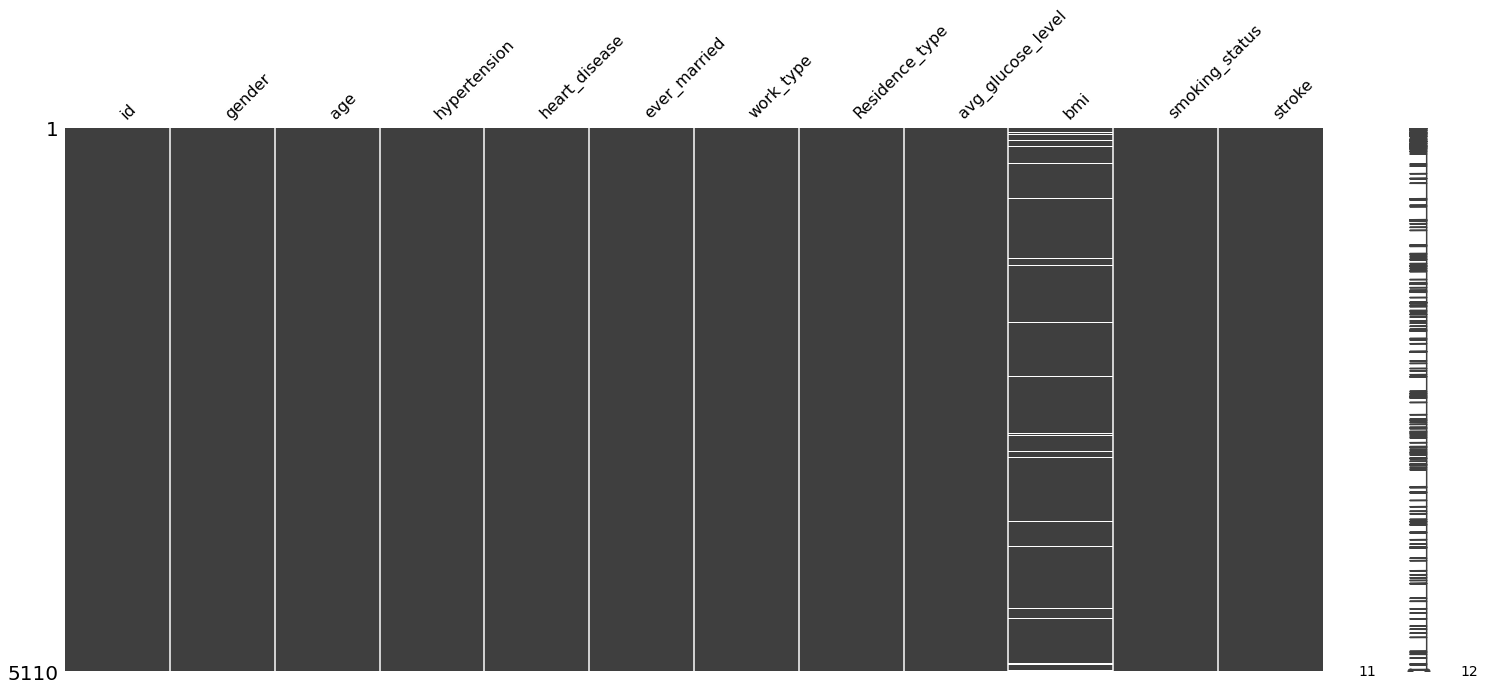

In [6]:
msno.matrix(df)

In [7]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


<AxesSubplot:>

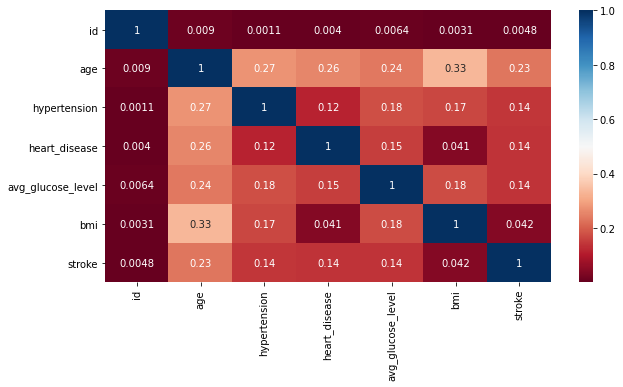

In [8]:
plt.figure(figsize=(10, 5))

sns.heatmap(df.corr(), annot=True, cmap="RdBu")

### **Is any sex more likely to have a stroke?**

In [9]:
df.groupby("gender").size()

gender
Female    2897
Male      2011
Other        1
dtype: int64

<AxesSubplot:xlabel='gender'>

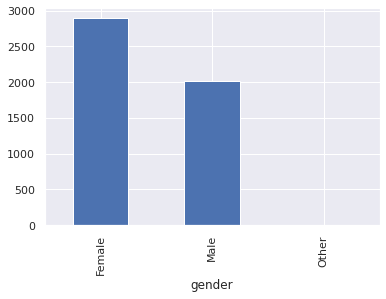

In [10]:
sns.set()
df.groupby("gender").size().plot.bar()

In [11]:
df.groupby("gender")["stroke"].value_counts()

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='gender,stroke'>

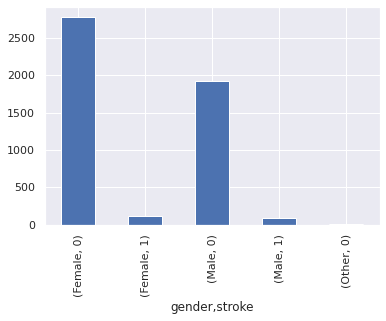

In [12]:
df.groupby("gender")["stroke"].value_counts().plot.bar()

In [13]:
women = df.loc[df.gender == 'Female']["stroke"]
rate_women = sum(women)/len(women)
rate_women

0.04142216085605799

In [14]:
men = df.loc[df.gender == 'Male']["stroke"]
rate_men = sum(men)/len(men)
rate_men

0.044256588761810045

### **Marriage increases the propensity to have a stroke?**

In [15]:
df.groupby("ever_married").size()

ever_married
No     1705
Yes    3204
dtype: int64

<AxesSubplot:xlabel='ever_married'>

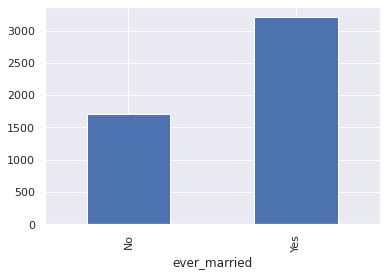

In [16]:
df.groupby("ever_married").size().plot.bar()

In [17]:
df.groupby("ever_married")["stroke"].value_counts()

ever_married  stroke
No            0         1682
              1           23
Yes           0         3018
              1          186
Name: stroke, dtype: int64

<AxesSubplot:xlabel='ever_married,stroke'>

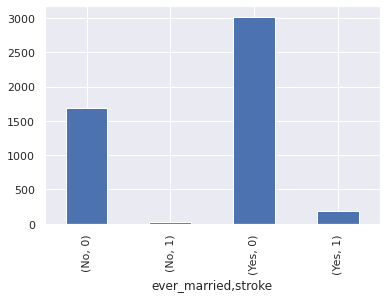

In [18]:
df.groupby("ever_married")["stroke"].value_counts().plot.bar()

In [19]:
married = df.loc[df.ever_married == 'Yes']["stroke"]
rate_married = sum(married)/len(married)
rate_married

0.05805243445692884

In [20]:
not_married = df.loc[df.ever_married == 'No']["stroke"]
rate_not_married = sum(not_married)/len(not_married)
rate_not_married

0.013489736070381233

### **Does smoking increase the propensity to have a stroke?**

In [21]:
df.groupby("smoking_status").size()

smoking_status
Unknown            1483
formerly smoked     837
never smoked       1852
smokes              737
dtype: int64

<AxesSubplot:xlabel='smoking_status'>

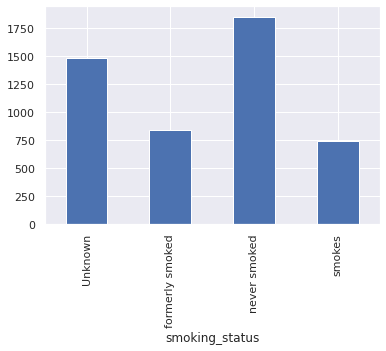

In [22]:
df.groupby("smoking_status").size().plot.bar()

In [23]:
df.groupby("smoking_status")["stroke"].value_counts()

smoking_status   stroke
Unknown          0         1454
                 1           29
formerly smoked  0          780
                 1           57
never smoked     0         1768
                 1           84
smokes           0          698
                 1           39
Name: stroke, dtype: int64

<AxesSubplot:xlabel='smoking_status,stroke'>

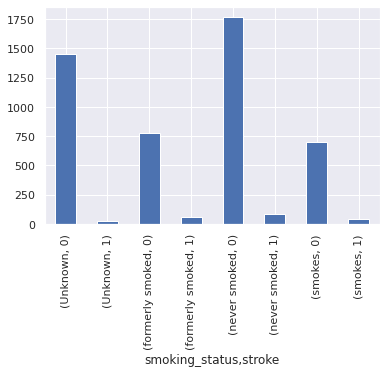

In [24]:
df.groupby("smoking_status")["stroke"].value_counts().plot.bar()

In [25]:
never_smoked = df.loc[df.smoking_status == 'never smoked']["stroke"]
rate_never_smoked = sum(never_smoked)/len(never_smoked)
rate_never_smoked

0.04535637149028078

In [26]:
formerly_smoked = df.loc[df.smoking_status == 'formerly smoked']["stroke"]
rate_formerly_smoked = sum(formerly_smoked)/len(formerly_smoked)
rate_formerly_smoked

0.06810035842293907

In [27]:
smokes = df.loc[df.smoking_status == 'smokes']["stroke"]
rate_smokes = sum(smokes)/len(smokes)
rate_smokes

0.052917232021709636

### **Does living in the city increase the chances of having a stroke?**

In [28]:
df.groupby("Residence_type").size()

Residence_type
Rural    2419
Urban    2490
dtype: int64

<AxesSubplot:xlabel='Residence_type'>

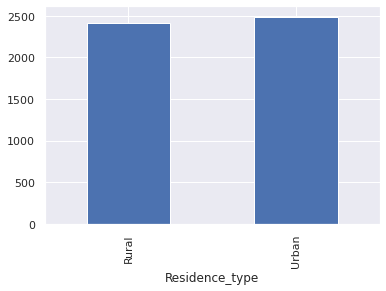

In [29]:
df.groupby("Residence_type").size().plot.bar()

In [30]:
df.groupby("Residence_type")["stroke"].value_counts()

Residence_type  stroke
Rural           0         2319
                1          100
Urban           0         2381
                1          109
Name: stroke, dtype: int64

<AxesSubplot:xlabel='Residence_type,stroke'>

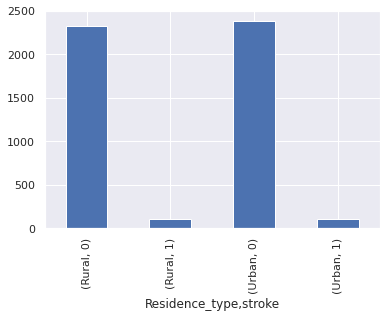

In [31]:
df.groupby("Residence_type")["stroke"].value_counts().plot.bar()

In [32]:
rural = df.loc[df.Residence_type == 'Rural']["stroke"]
rate_rural = sum(rural)/len(rural)
rate_rural

0.0413393964448119

In [33]:
urban = df.loc[df.Residence_type == 'Urban']["stroke"]
rate_urban = sum(urban)/len(urban)
rate_urban

0.043775100401606426

### **Does your type of work increase the likelihood of having a stroke?**

In [34]:
df.groupby("work_type").size()

work_type
Govt_job          630
Never_worked       22
Private          2811
Self-employed     775
children          671
dtype: int64

<AxesSubplot:xlabel='work_type'>

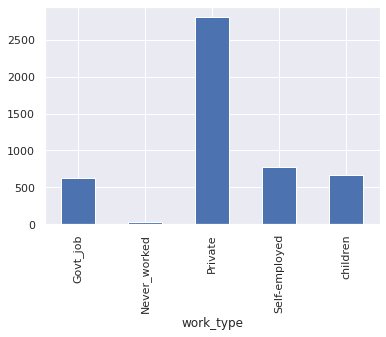

In [35]:
df.groupby("work_type").size().plot.bar()

In [36]:
df.groupby("work_type")["stroke"].value_counts()

work_type      stroke
Govt_job       0          602
               1           28
Never_worked   0           22
Private        0         2684
               1          127
Self-employed  0          722
               1           53
children       0          670
               1            1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='work_type,stroke'>

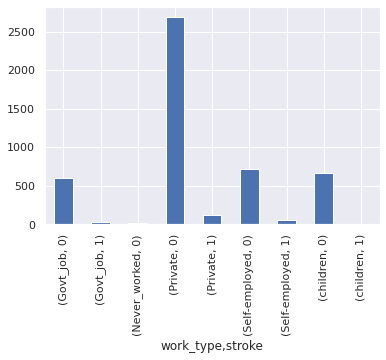

In [37]:
df.groupby("work_type")["stroke"].value_counts().plot.bar()

In [38]:
gov_job = df.loc[df.work_type == 'Govt_job']["stroke"]
rate_gov_job = sum(gov_job)/len(gov_job)
rate_gov_job

0.044444444444444446

In [39]:
private = df.loc[df.work_type == 'Private']["stroke"]
rate_private = sum(private)/len(private)
rate_private

0.04517965136961935

In [40]:
self_employed = df.loc[df.work_type == 'Self-employed']["stroke"]
rate_self_employed = sum(self_employed)/len(self_employed)
rate_self_employed

0.06838709677419355

In [41]:
children = df.loc[df.work_type == 'children']["stroke"]
rate_children = sum(children)/len(children)
rate_children

0.0014903129657228018

### **Does a single variable for hypertension and heart disease increase the correlation?**

In [42]:
df['health_problems'] = df['hypertension'] + df['heart_disease']

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_problems
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0


<AxesSubplot:>

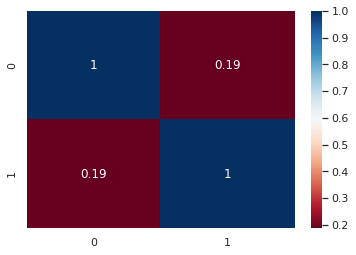

In [43]:
corr_stroke_health_problems = np.corrcoef(df["stroke"], df["health_problems"])

sns.heatmap(corr_stroke_health_problems, annot=True, cmap="RdBu")

### **Does obesity increase the chances of stroke?**

In [44]:
bins = [0, 18.5, 25, 30, 35, 40, 100]

# Creating categories to each cut
groups = ["Underweight", "Normal Range", "Overweight", "Obese I", "Obese II",
          "Obese III"]

# Creating a column with the categories to each cut
df["bmi_per_10"] = pd.cut(df.bmi, bins, labels=groups)


df_strokes = df[df["stroke"] == 1]
df_strokes.groupby("bmi_per_10").size()

bmi_per_10
Underweight      1
Normal Range    37
Overweight      75
Obese I         54
Obese II        24
Obese III       18
dtype: int64

<AxesSubplot:xlabel='bmi_per_10'>

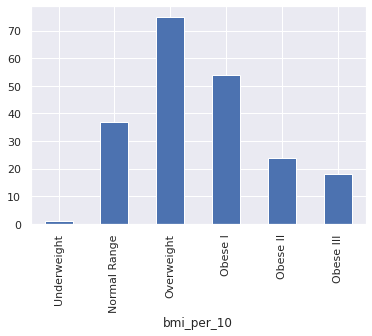

In [45]:
df_strokes.groupby("bmi_per_10")["stroke"].size().plot.bar()

In [46]:
for n in df["bmi_per_10"].unique():
    rate = df.loc[df.bmi_per_10 == n]["stroke"]
    print(f"{n}: {sum(rate)/len(rate)}")
    

Obese II: 0.048
Obese I: 0.05482233502538071
Normal Range: 0.029411764705882353
Overweight: 0.053229240596167494
Obese III: 0.04411764705882353
Underweight: 0.0028653295128939827


In [47]:
df_strokes.groupby("bmi_per_10")["heart_disease"].size()

bmi_per_10
Underweight      1
Normal Range    37
Overweight      75
Obese I         54
Obese II        24
Obese III       18
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='bmi_per_10'>

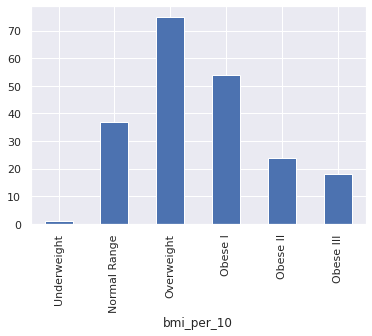

In [48]:
df_strokes.groupby("bmi_per_10")["heart_disease"].size().plot.bar()

### **What percentage of people had a stroke within the most dangerous profile?**

In [49]:
df.groupby("stroke").size()

stroke
0    4700
1     209
dtype: int64

<AxesSubplot:xlabel='stroke'>

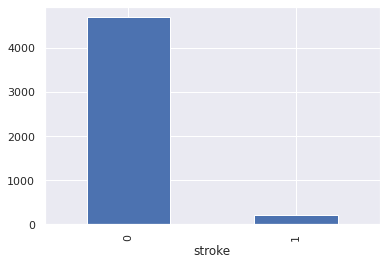

In [50]:
df.groupby("stroke").size().plot.bar()

In [51]:
sum(df.stroke)/len(df.stroke)

0.04257486249745366

In [52]:
df_profile = df.query("health_problems > 0 & bmi > 25 & stroke == 1")

len(df_profile.index)

74

In [53]:
len(df_profile.index)/len(df_strokes["stroke"])

0.35406698564593303

### **Starting to create our model**

In [54]:
!pip install pycaret

     |████████████████████████████████| 261 kB 866 kB/s eta 0:00:01
     |████████████████████████████████| 101 kB 3.0 MB/s ta 0:00:01
     |████████████████████████████████| 14.2 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 23.4 MB/s eta 0:00:01


     |████████████████████████████████| 77 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 262 kB/s eta 0:00:01


  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=f762b445ec61ea2b98636f54e3f33e00306986fc326c94beb09f3ec227867d8b
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.14.2-py3-none-any.whl size=100732 sha256=59a254e9ad303b1ddd19bcab43143311f64fd20e6e5ccc34204542dd1b277083
  Stored in directory: /root/.cache/pip/wheels/54/8a/cd/8861fff0bea4a752ffe7561eb74e130c9ae38cdb7e43eb7b66
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17158 sha256=200bc6d5e078a0e9158703fb20ce446ed2cf1a8464f1874bc88be6f1466278a1
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a3a226565e27f0a7eb7a3ac93c3f4d68acfbe617
  Created wheel for pyod: filename=pyod-0.8.7-py3-none-any.whl size=115977 sha256=f65207d7b15dda03943cb685ec545499a90fefffdac68a6b596227e094310f1b
  Stored in direct

In [121]:
df = df.drop('id', axis =1)

In [180]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'health_problems', 'bmi_per_10'],
      dtype='object')

In [181]:
df2 = df[["gender", "age", "health_problems", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke"]].copy()

df2.head()

,gender,age,health_problems,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [196]:
from pycaret.classification import *
xp1 = setup(df2, target = "stroke", train_size = 0.85, fix_imbalance=True, normalize=True, remove_outliers=True, outliers_threshold=0.08, ignore_low_variance=True, transformation=True)

,Description,Value
0,session_id,4023
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4909, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [197]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9495,0.7819,0.0712,0.1075,0.0825,0.0582,0.0608,0.8560
et,Extra Trees Classifier,0.9466,0.7444,0.0481,0.0875,0.0611,0.0348,0.0376,0.6570
xgboost,Extreme Gradient Boosting,0.9461,0.7756,0.1045,0.1396,0.1145,0.0875,0.0909,3.7030
lightgbm,Light Gradient Boosting Machine,0.9448,0.7837,0.0878,0.0865,0.0851,0.0584,0.0586,0.1880
catboost,CatBoost Classifier,0.9429,0.7678,0.0962,0.1089,0.0981,0.0702,0.0718,6.1910
dt,Decision Tree Classifier,0.9166,0.5772,0.2141,0.1085,0.1437,0.1051,0.1119,0.0430
gbc,Gradient Boosting Classifier,0.9132,0.7814,0.2878,0.1298,0.1783,0.1397,0.1523,0.7480
knn,K Neighbors Classifier,0.8640,0.6537,0.2962,0.0789,0.1244,0.0770,0.0972,0.1320
ada,Ada Boost Classifier,0.8619,0.7985,0.4462,0.1116,0.1780,0.1326,0.1707,0.2540
lr,Logistic Regression,0.7475,0.8255,0.7346,0.0895,0.1595,0.1078,0.1937,0.0540


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4023, verbose=0,
                       warm_start=False)

In [198]:
model_rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9401,0.8058,0.0000,0.0000,0.0000,-0.0308,-0.0308
1,0.9583,0.8261,0.1667,0.2500,0.2000,0.1795,0.1834
2,0.9505,0.6845,0.0000,0.0000,0.0000,-0.0236,-0.0245
3,0.9531,0.7666,0.0000,0.0000,0.0000,-0.0192,-0.0215
4,0.9635,0.8173,0.1538,0.4000,0.2222,0.2073,0.2325
5,0.9505,0.7995,0.1538,0.2000,0.1739,0.1489,0.1502
6,0.9349,0.7600,0.1538,0.1250,0.1379,0.1045,0.1051
7,0.9531,0.7959,0.0000,0.0000,0.0000,-0.0192,-0.0215
8,0.9478,0.7884,0.0833,0.1000,0.0909,0.0643,0.0645
9,0.9426,0.7750,0.0000,0.0000,0.0000,-0.0293,-0.0294


In [199]:
tune_model = tune_model(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9688,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9688,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9688,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9661,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9687,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9687,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
